<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-10-22 20:42:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.2MB/s    in 2.5s    

2025-10-22 20:42:02 (60.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



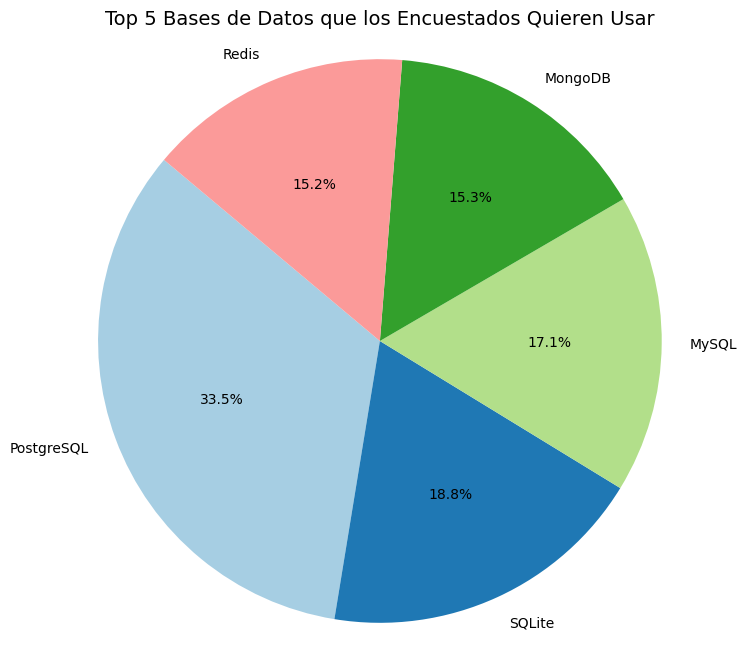

In [4]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consultar columna de interés
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Explode de bases de datos (pueden estar separadas por ;) ---
df_exp = df.assign(Database=df["DatabaseWantToWorkWith"].str.split(";"))
df_exp = df_exp.explode("Database")
df_exp["Database"] = df_exp["Database"].str.strip()
df_exp = df_exp.dropna(subset=["Database"])

# --- Contar frecuencia y seleccionar top 5 ---
top5_db = df_exp["Database"].value_counts().head(5)

# --- Pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    top5_db,
    labels=top5_db.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Top 5 Bases de Datos que los Encuestados Quieren Usar", fontsize=14)
plt.axis("equal")  # Para que el pie sea circular
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



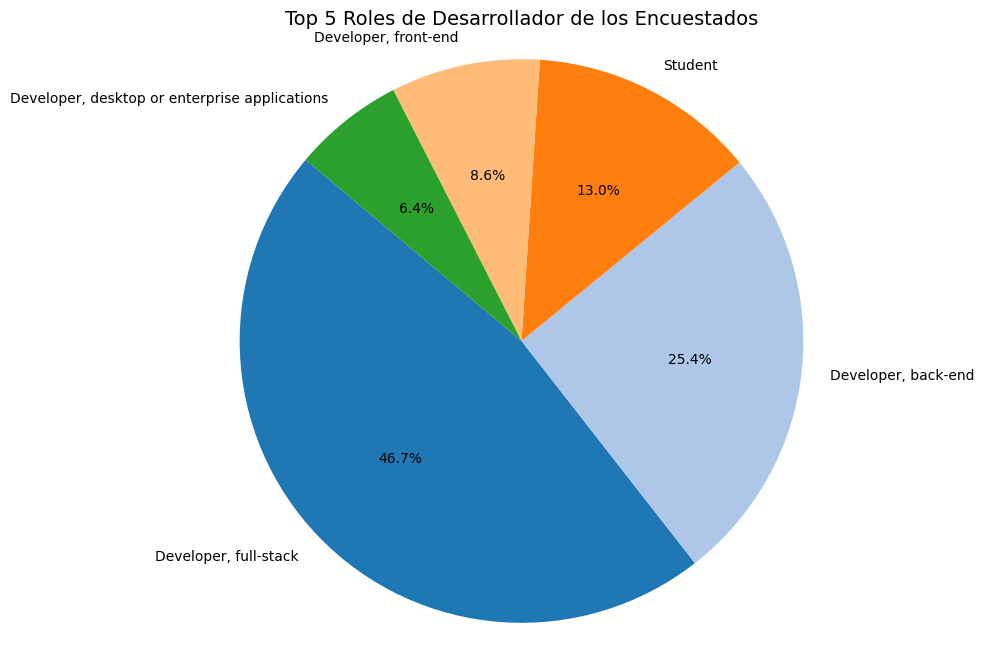

In [5]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consultar columna de interés
query = """
SELECT DevType
FROM main
WHERE DevType IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Explode de DevType (pueden estar separados por ;) ---
df_exp = df.assign(Role=df["DevType"].str.split(";"))
df_exp = df_exp.explode("Role")
df_exp["Role"] = df_exp["Role"].str.strip()
df_exp = df_exp.dropna(subset=["Role"])

# --- Contar frecuencia y seleccionar top 5 ---
top5_roles = df_exp["Role"].value_counts().head(5)

# --- Pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    top5_roles,
    labels=top5_roles.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title("Top 5 Roles de Desarrollador de los Encuestados", fontsize=14)
plt.axis("equal")  # Para que el pie sea circular
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [8]:
##Write your code
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conexión a la base de datos
conn = sqlite3.connect('survey-data.sqlite')

# Consultar la columna correcta
query = """
SELECT OpSys
FROM main
WHERE OpSys IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Explode de sistemas operativos si hay múltiples por registro ---
df_exp = df.assign(OpSys=df["OpSys"].str.split(";"))
df_exp = df_exp.explode("OpSys")
df_exp["OpSys"] = df_exp["OpSys"].str.strip()
df_exp = df_exp.dropna(subset=["OpSys"])

# --- Contar frecuencia y seleccionar top 5 ---
top5_os = df_exp["OpSys"].value_counts().head(5)

# --- Pie chart ---
plt.figure(figsize=(8,8))
plt.pie(
    top5_os,
    labels=top5_os.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Top 5 Sistemas Operativos Usados Profesionalmente", fontsize=14)
plt.axis("equal")  # Para que el pie sea circular
plt.show()



DatabaseError: Execution failed on sql '
SELECT OpSys
FROM main
WHERE OpSys IS NOT NULL
': no such column: OpSys

### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



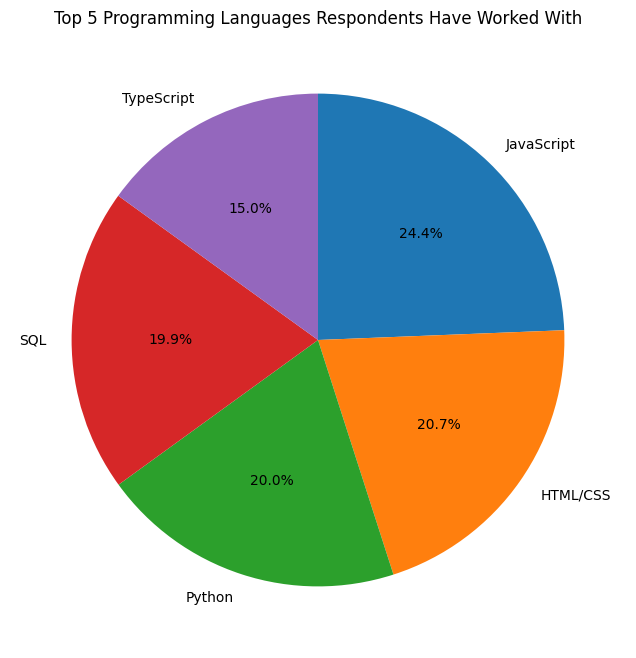

In [9]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# --- Leer los datos desde la base ---
query = """
SELECT LanguageHaveWorkedWith
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Separar múltiples lenguajes por punto y coma ---
df_exp = df.assign(Language=df["LanguageHaveWorkedWith"].str.split(";")).explode("Language")

# --- Contar frecuencia de cada lenguaje ---
language_counts = df_exp["Language"].value_counts().head(5)

# --- Crear pie chart ---
plt.figure(figsize=(8, 8))
plt.pie(
    language_counts,
    labels=language_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("Top 5 Programming Languages Respondents Have Worked With")
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



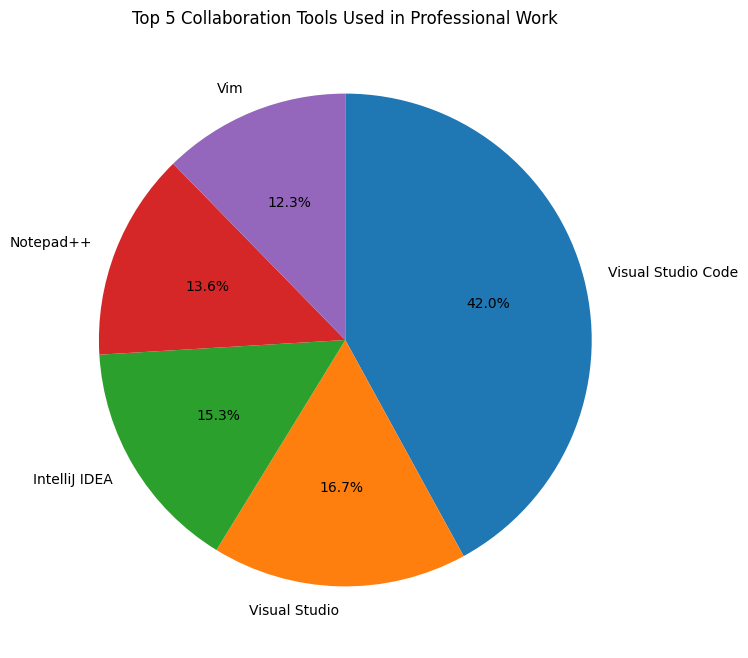

In [10]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# --- Consultar la columna de colaboración ---
query = """
SELECT NEWCollabToolsHaveWorkedWith
FROM main
WHERE NEWCollabToolsHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Separar las herramientas (pueden estar separadas por ;) ---
df_exp = df.assign(Tool=df["NEWCollabToolsHaveWorkedWith"].str.split(";")).explode("Tool")

# --- Contar frecuencia de uso ---
tool_counts = df_exp["Tool"].value_counts().head(5)

# --- Crear pie chart ---
plt.figure(figsize=(8, 8))
plt.pie(
    tool_counts,
    labels=tool_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("Top 5 Collaboration Tools Used in Professional Work")
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



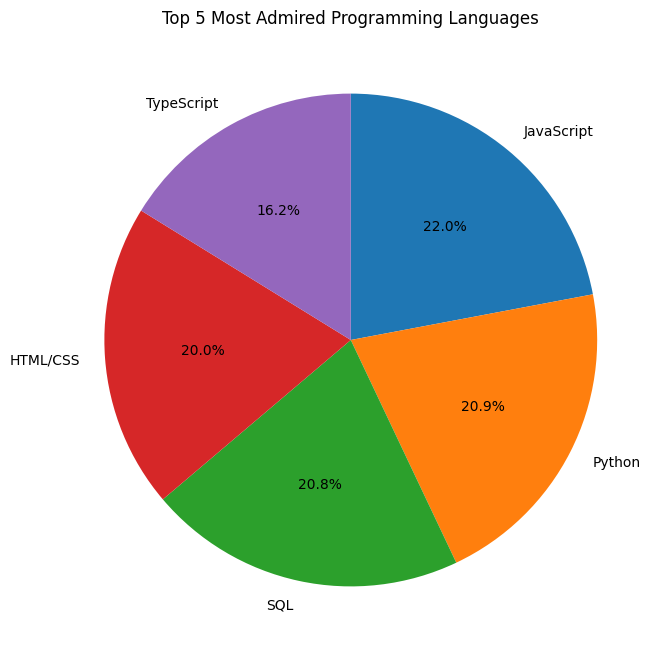

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# --- Consultar la columna de lenguajes admirados ---
query = """
SELECT LanguageAdmired
FROM main
WHERE LanguageAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Separar los lenguajes (pueden estar separados por ;) ---
df_exp = df.assign(Language=df["LanguageAdmired"].str.split(";")).explode("Language")

# --- Contar frecuencia de cada lenguaje ---
language_counts = df_exp["Language"].value_counts().head(5)

# --- Crear el gráfico de torta ---
plt.figure(figsize=(8, 8))
plt.pie(
    language_counts,
    labels=language_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("Top 5 Most Admired Programming Languages")
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# --- Consultar la columna de herramientas de IA actualmente usadas ---
query = """
SELECT AIToolCurrentlyUsing
FROM main
WHERE AIToolCurrentlyUsing IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Separar herramientas (pueden estar separadas por ;) ---
df_exp = df.assign(AITool=df["AIToolCurrentlyUsing"].str.split(";")).explode("AITool")

# --- Contar frecuencia de cada herramienta ---
ai_counts = df_exp["AITool"].value_counts().head(5)

# --- Crear el gráfico de torta ---
plt.figure(figsize=(8, 8))
plt.pie(
    ai_counts,
    labels=ai_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("Top 5 AI Tools Currently Used by Developers")
plt.show()


DatabaseError: Execution failed on sql '
SELECT AIToolCurrentlyUsing
FROM main
WHERE AIToolCurrentlyUsing IS NOT NULL
': no such column: AIToolCurrentlyUsing

##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



In [ ]:
##Write your code here

##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



In [ ]:
##Write your code here

### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
